---
title: "Midterm exam 2025, Regression Problem"
subtitle: "Machine Learning"
date: "February 2025"
date-format: "MMMM YYYY"
author: 
  - F.San Segundo & N.Rodríguez
code-overflow: wrap
format: 
  html: 
    toc: true
    code-tools: true
    code-fold: show
    code-summary: "Hide the code"
    embed-resources: true
---

In [1]:
%cd ./00_previous_exams/Midterm2025

/wd/00_previous_exams/Midterm2025


<h1 style="color:red;">Instructions: Read Carefully!</h1>


- **[Use this Jupyter notebook]{.underline}** to complete the required tasks and submit it to Moodle. Keep the sectioning structure of the notebook and insert the code cells you need in the corresponding sections.

- The notebook should contain the code with your **analysis** and **it must be reproducible**. Set the random seeds to ensure that.

- The **most important part of your work is the comments and interpretation** of the analysis results obtained. **Do not include uncommented figures**. Remember to include a **conclusion section** at the end.                          

- **[Use OBS to record your screen]{.underline}**. Upload the video file (max. 500Mb) to Moodle. Alternatively, make sure to copy it to one of the pendrives that will be provided.

- The exam has **two notebooks:** one for the Classification problem (30% of the grading) and this one for the **Regression Problem**. You must submit both of them to Moodle.


## Statement of the Regression Problem

### Dataset 

+ Look for your student code in the `student_codes.txt` file. Use the corresponding zip file cpntaining the data files for your analysis.  
  **IMPORTANT:** An exam done with a wrong dataset implies a failed exam.                        

+ Load the training set **dfTR_reg_XX.csv** and the test set **dfTS_reg_XX.csv** corresponding to your student code.

+ The dataset contains 7 input variables called X1 to X7. The output numeric variable is called Y.

### External Code and Imports

+ The first code cell below contains standard imports that we have used in the sessions. With these imports you should be able to do all the tasks in the exam; that is not to say that you need to use all of them, and you are invited to use extra imports if you feel the need.

+ We have also included a Python script `auxiliary_code.py` with two functions called `ResidualPlots` and `explore_outliers` that will be available when you run the second cell in this notebook. 

<h2 style="color:red;">The regression problem has two parts, using the same dataset.</h2>

We **strongly recommend** you to organize your work using the results in the sessions of the course corresponding to the model you are fitting.  

In [2]:
### Load necessary modules -------------------------------
# interactive plotting
# %matplotlib inline
%config InlineBackend.figure_format = 'png' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()
import statsmodels.api as sm


# Data management libraries
import numpy as np 
import pandas as pd
import scipy.stats as stats

# Machine learning libraries
from sklearn.metrics import root_mean_squared_error 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, PowerTransformer

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

# Scikit-learn regression models
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.inspection import permutation_importance

# Others
import warnings


In [3]:
# Ignore all warnings
import os
warnings.filterwarnings("ignore")

# Specifically target Scikit-Learn/FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Some environments also require setting an environment variable
os.environ['PYTHONWARNINGS'] = 'ignore'

In [4]:
### Load necessary modules -------------------------------
# interactive plotting
# %matplotlib inline
%config InlineBackend.figure_format = 'png' # ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set()
import statsmodels.api as sm


# Data management libraries
import numpy as np 
import pandas as pd
import scipy.stats as stats

# Machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# others
import warnings

# Connecting statsmodels with sklearn via sklearn2pmml and patsy 
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn2pmml.statsmodels import StatsModelsRegressor

# patsy for lineal model formula language
import patsy as ps

from patsy_utils.patsy_formulaic_transformer import FormulaTransformer

In [5]:
%run -i "auxiliary_code.py"

# Regression Part I

For this first part we **strongly recommend** you to organize your work using the results in sessions 3_1 and 3_2 of the course. 

### 1.1  Exploratory analysis of the training data

**IMPORTANT:** *we have provided you with separate training and test sets for reproducibility. But the training set may still need basic preprocessing! Do not assume that the training data has been thoroughly cleaned. The test set, on the other hand, can be used as it is.*


In [6]:
dfTR = pd.read_csv("./dfTR_reg_02.csv")
dfTS = pd.read_csv("./dfTS_reg_02.csv")
dfTR.head()

X1        X2        X3 X4        X5        X6        X7           Y
0 -1.915193  0.912981 -0.348239  A -0.290183  0.011066  3.891507  493.865712
1  1.059666 -0.662881  1.814415  B -0.158088 -0.518349  5.225697   26.363208
2 -0.971432  1.606014 -1.591034  A -0.974238 -0.977556  7.125767  597.776134
3  1.585106 -0.909197 -1.525660  B -1.287262  0.302834  2.909391  -70.329943
4 -1.772418  2.705041 -0.496650  A  1.519974  0.123994  3.837321  484.151054

### 1.2. Fit a linear regression model to the training set

*Fit a linear regression model to the training set to predict the output variable Y using X1, ..., X7 as input variables.*

#### 1.2.1. Analyze the significance of the model coefficients and the residuals plots

In [7]:
dfTR.apply(lambda x: x.nunique())

X1    1598
X2    1600
X3    1600
X4       2
X5    1596
X6    1598
X7    1600
Y     1600
dtype: int64

In [8]:
dfTS.apply(lambda x: x.nunique())

X1    400
X2    400
X3    400
X4      2
X5    400
X6    400
X7    400
Y     400
dtype: int64

In [9]:
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1598 non-null   float64
 1   X2      1600 non-null   float64
 2   X3      1600 non-null   float64
 3   X4      1600 non-null   object 
 4   X5      1596 non-null   float64
 5   X6      1598 non-null   float64
 6   X7      1600 non-null   float64
 7   Y       1600 non-null   float64
dtypes: float64(7), object(1)
memory usage: 100.1+ KB


In [10]:
dfTR.dropna(inplace=True)

In [11]:
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1592 non-null   float64
 1   X2      1592 non-null   float64
 2   X3      1592 non-null   float64
 3   X4      1592 non-null   object 
 4   X5      1592 non-null   float64
 5   X6      1592 non-null   float64
 6   X7      1592 non-null   float64
 7   Y       1592 non-null   float64
dtypes: float64(7), object(1)
memory usage: 111.9+ KB


In [12]:
output = "Y"
inputs = dfTR.columns.drop(output).tolist()
cat_inputs = ["X4"]
num_inputs = dfTR.columns.drop(output).drop(cat_inputs).tolist()
inputs, num_inputs, cat_inputs


(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'],
 ['X1', 'X2', 'X3', 'X5', 'X6', 'X7'],
 ['X4'])

In [13]:
dfTR.describe()

X1           X2           X3           X5           X6  \
count  1592.000000  1592.000000  1592.000000  1592.000000  1592.000000   
mean     -0.044285     0.062710    -0.023267     0.026889    -0.030988   
std       3.079385     3.220906     2.022293     0.972466     1.843208   
min      -9.287418   -11.252758    -7.005093    -2.791902   -50.182657   
25%      -2.146097    -2.088355    -1.417549    -0.630804    -0.328046   
50%      -0.041101     0.102054     0.025805     0.027411     0.014969   
75%       1.911917     2.296817     1.294556     0.701394     0.373850   
max      29.576299    10.084090     5.811082     2.895377     1.572725   

                X7            Y  
count  1592.000000  1592.000000  
mean      3.905167   180.748207  
std       1.544406   271.951835  
min      -0.804941  -699.540693  
25%       2.848527   -50.445909  
50%       3.931860    61.298067  
75%       4.964906   455.435498  
max       8.689782   647.574620

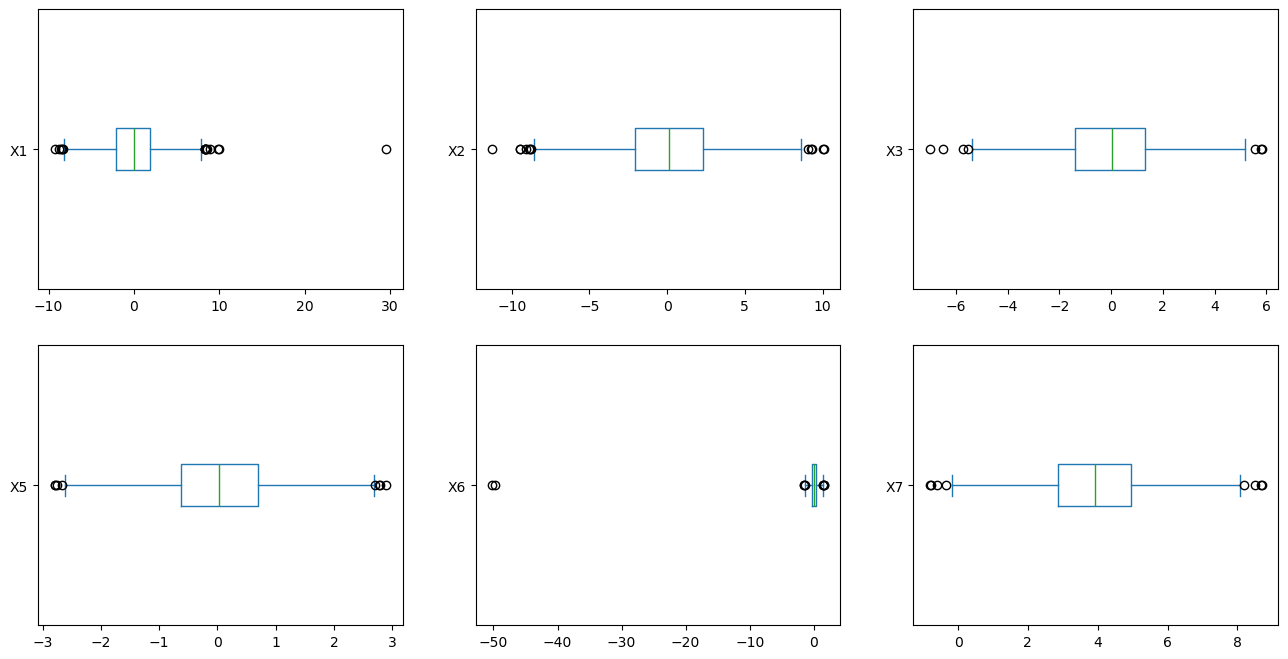

In [14]:
dfTR_numeric_boxplots = dfTR[num_inputs].plot.box(subplots=True, vert=False,
                                            layout=(len(num_inputs)//3 + len(num_inputs)%3, 3), 
                                            sharex=False, sharey=False, figsize=(16, 4 * len(num_inputs)//3))

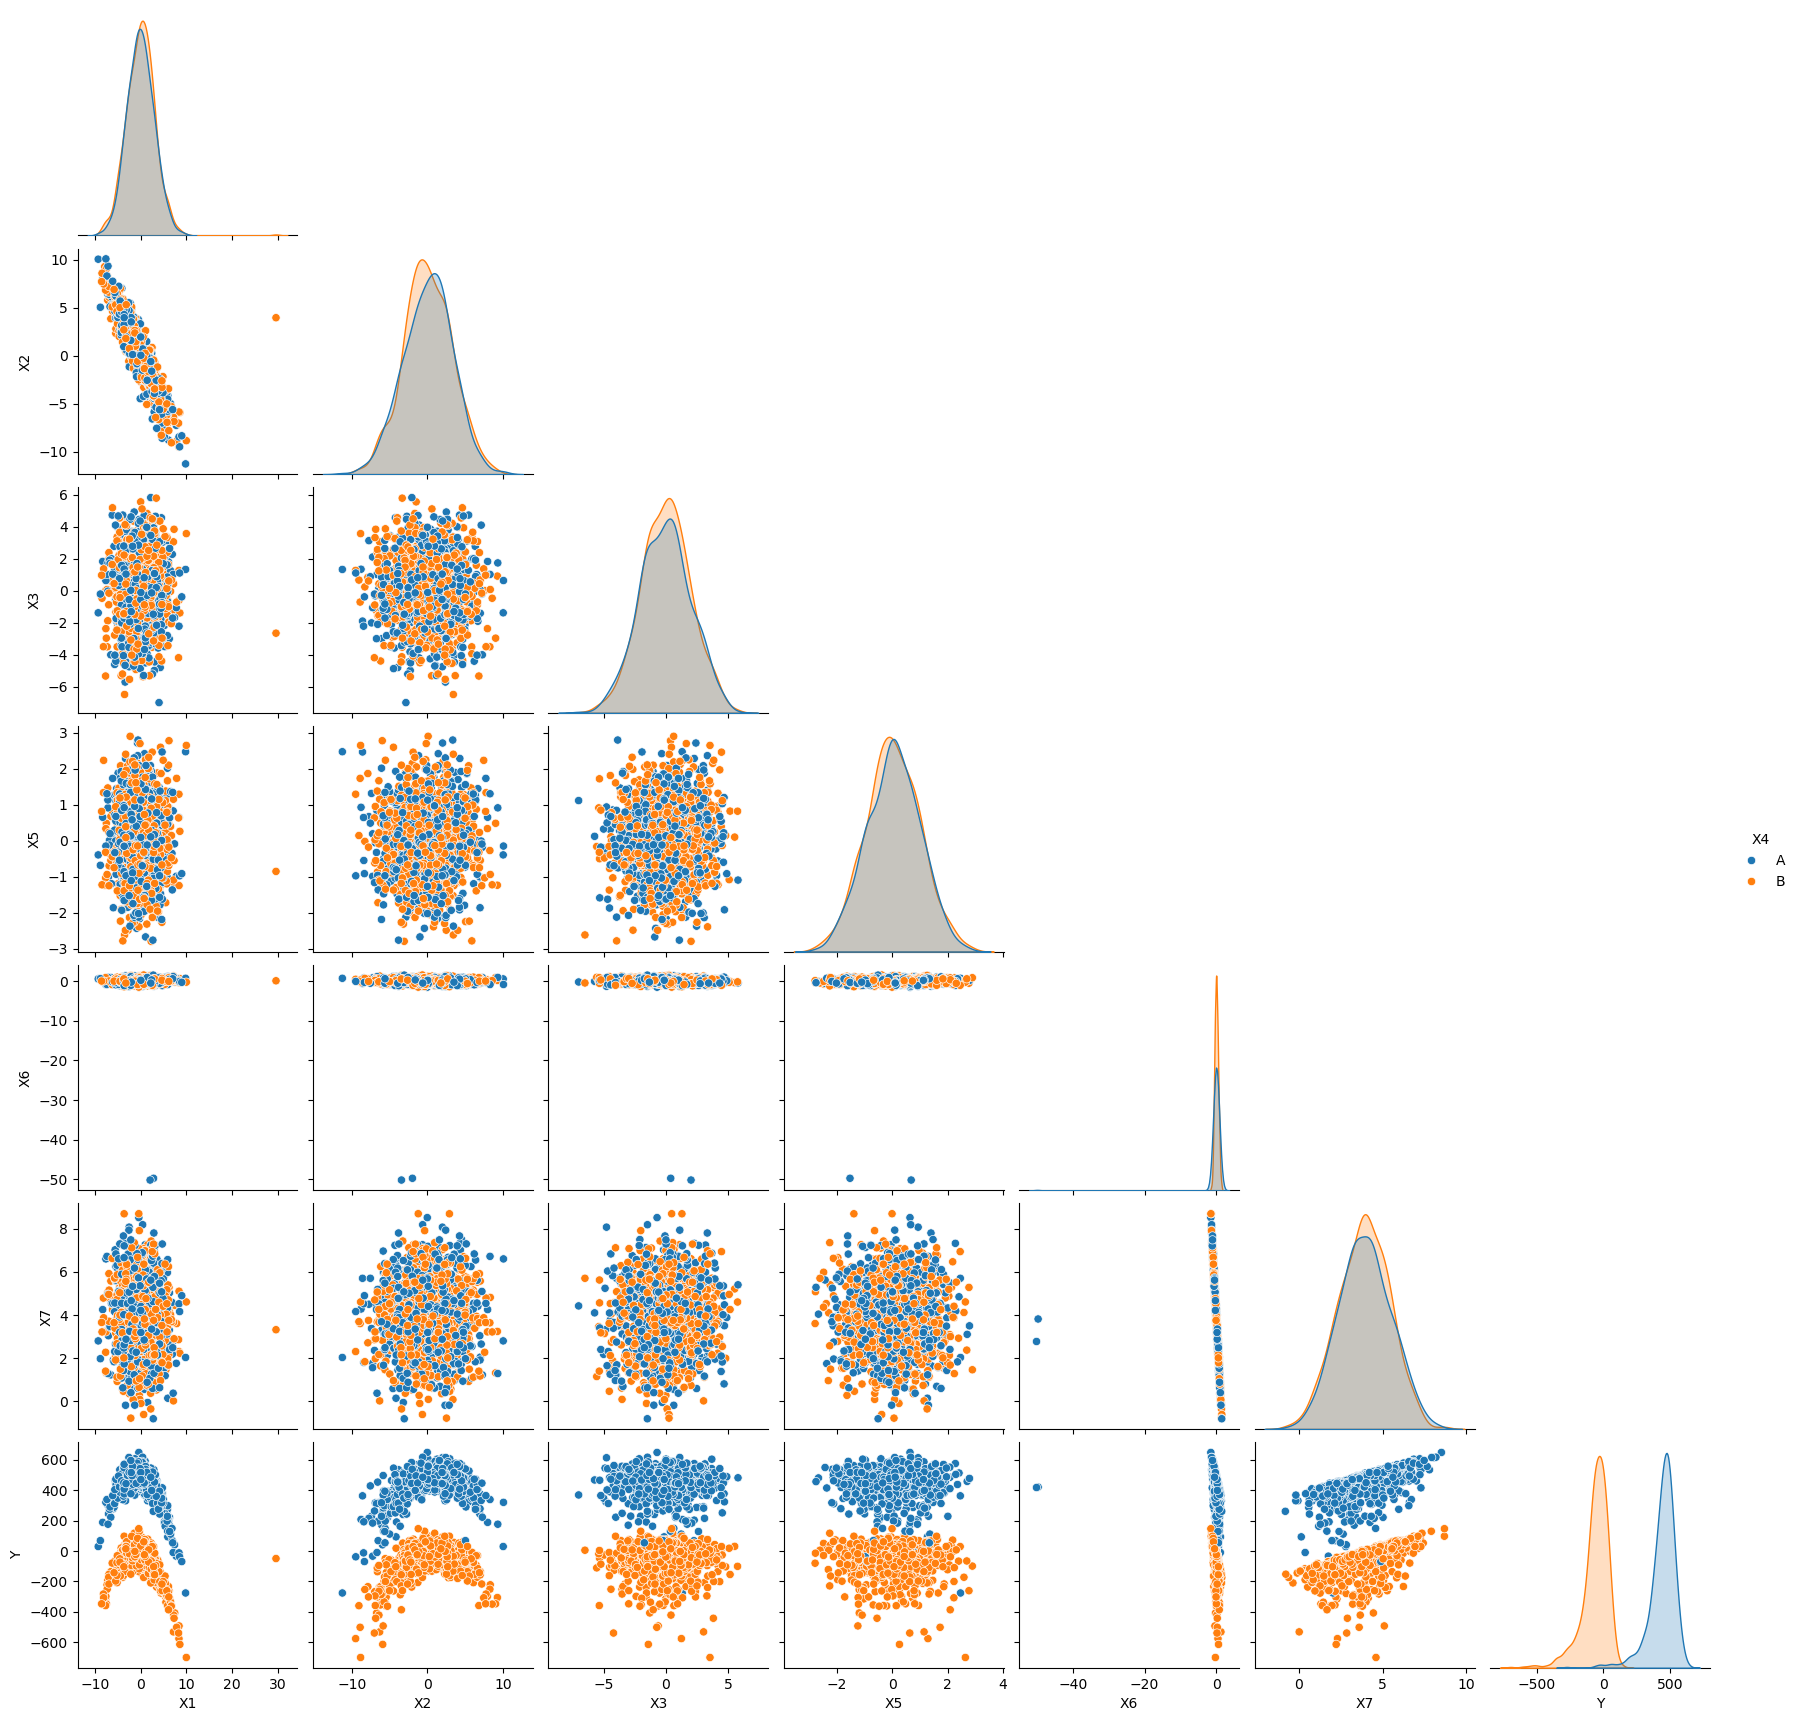

In [15]:
show_pairplot = True
if show_pairplot:
    sns.pairplot(dfTR, corner=True, hue="X4")

Analyzing the relation between factor input X4 and  X1


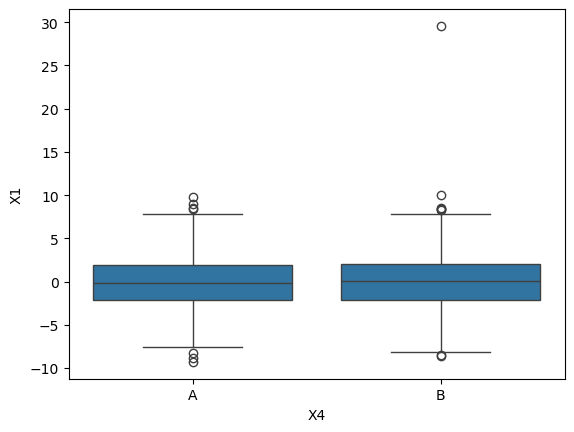

Analyzing the relation between factor input X4 and  X2


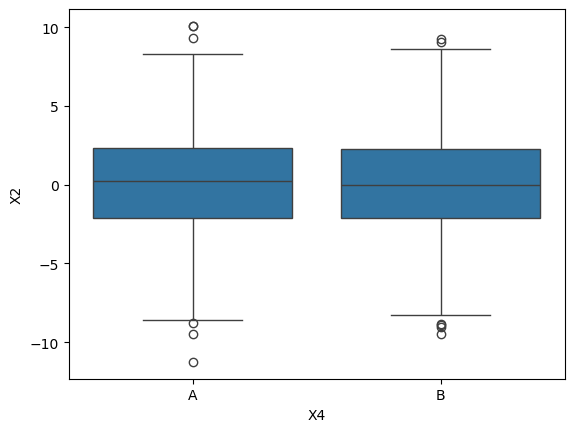

Analyzing the relation between factor input X4 and  X3


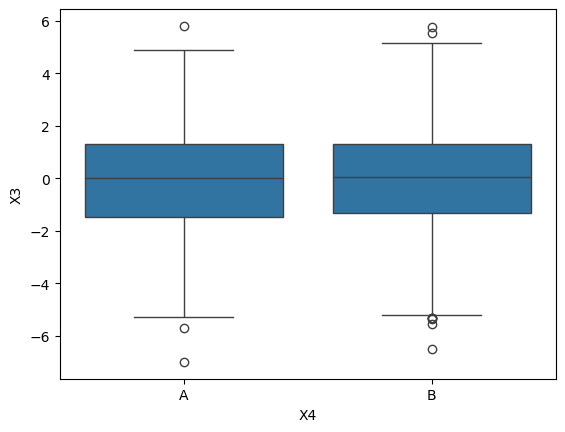

Analyzing the relation between factor input X4 and  X5


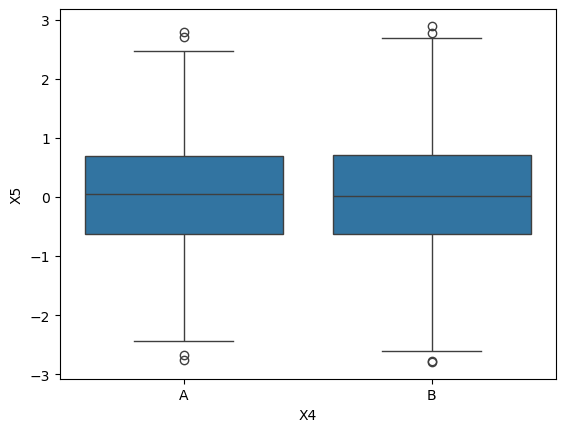

Analyzing the relation between factor input X4 and  X6


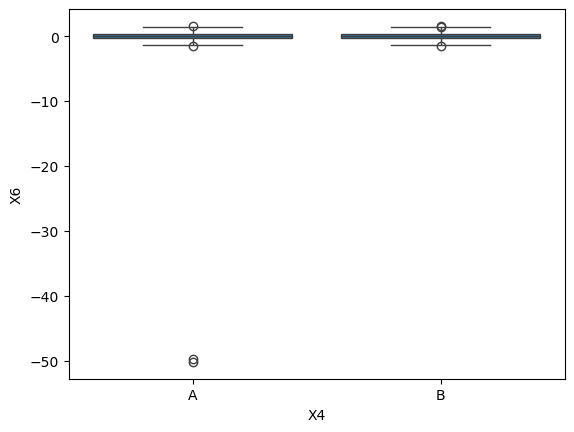

Analyzing the relation between factor input X4 and  X7


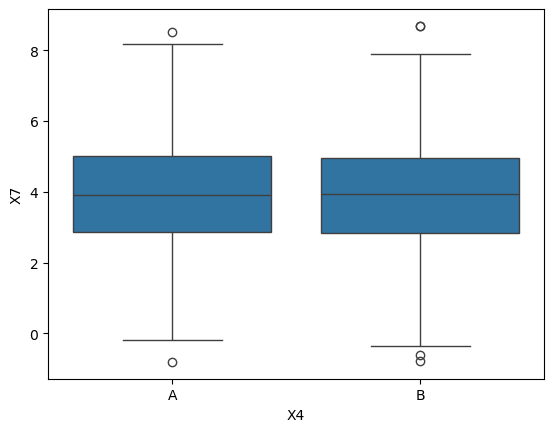

Analyzing the relation between factor input X4 and  Y


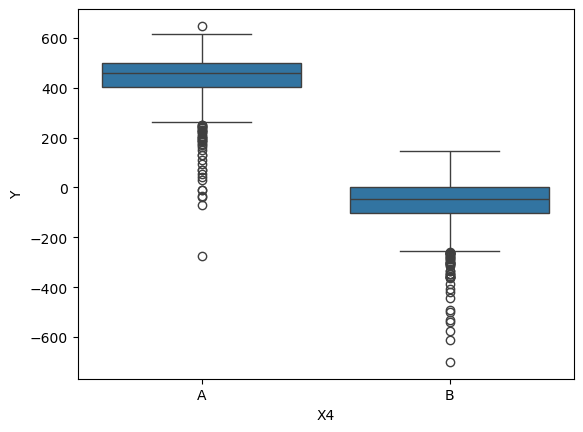

In [16]:
show_parallel_boxplots = True

if show_parallel_boxplots: 
    for numVar in num_inputs + [output]: 
        catvar_num = 0
        if len(cat_inputs) > 1:
            plt.figure(figsize=(12, 1))
            fig, axes = plt.subplots(1, len(cat_inputs))  # create figure and axes
            print(f"Analyzing the relation between factor inputs {cat_inputs[catvar_num]} and ", numVar)
            for col, ax in zip(cat_inputs, axes):  # boxplot for each factor inpput            
                catvar_num += 1
                sns.boxplot(data=dfTR, x = col, y = numVar, ax=ax) 
                ax.tick_params(axis='x', rotation=45, labelsize=8)  # Rotate and resize x-axis labels            
            # set subplot margins
            plt.subplots_adjust(left=0.9, bottom=0.4, right=2, top=1, wspace=1, hspace=1)
            plt.show();plt.close();
        else:
            print(f"Analyzing the relation between factor input {cat_inputs[0]} and ", numVar)
            sns.boxplot(data=dfTR, x = cat_inputs[0], y = numVar)
            plt.show();plt.close();


In [17]:
def remove_outliers(X, method="iqr", threshold=1.5):
    if isinstance(X, pd.DataFrame):
        X = X.copy()  # Avoid modifying the original DataFrame
        columns = X.columns  # Save column names
        idx = X.index  # Save row index
        X_values = X.values  # Work on raw numpy array

    else:
        return X  # If not a DataFrame, return as is

    if method == "iqr":
        Q1 = np.nanpercentile(X_values, 25, axis=0)
        Q3 = np.nanpercentile(X_values, 75, axis=0)
        IQR = Q3 - Q1
        mask = (X_values >= Q1 - threshold * IQR) & (X_values <= Q3 + threshold * IQR)
    elif method == "std":
        mean = np.nanmean(X_values, axis=0)
        std = np.nanstd(X_values, axis=0)
        mask = (X_values >= mean - threshold * std) & (X_values <= mean + threshold * std)
    else:
        return X  # If the method is not valid, return without changes

    X_values = np.where(mask, X_values, np.nan)  # Convert outliers to NaN
    return pd.DataFrame(X_values, columns=columns, index=idx)  # Convert back to DataFrame


In [18]:
dfTR[["X1", "X6"]] = remove_outliers(dfTR[["X1", "X6"]], method="iqr", threshold=1.5)

In [19]:
dfTR.dropna(inplace=True)

In [20]:
dfTR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1568 non-null   float64
 1   X2      1568 non-null   float64
 2   X3      1568 non-null   float64
 3   X4      1568 non-null   object 
 4   X5      1568 non-null   float64
 5   X6      1568 non-null   float64
 6   X7      1568 non-null   float64
 7   Y       1568 non-null   float64
dtypes: float64(7), object(1)
memory usage: 110.2+ KB


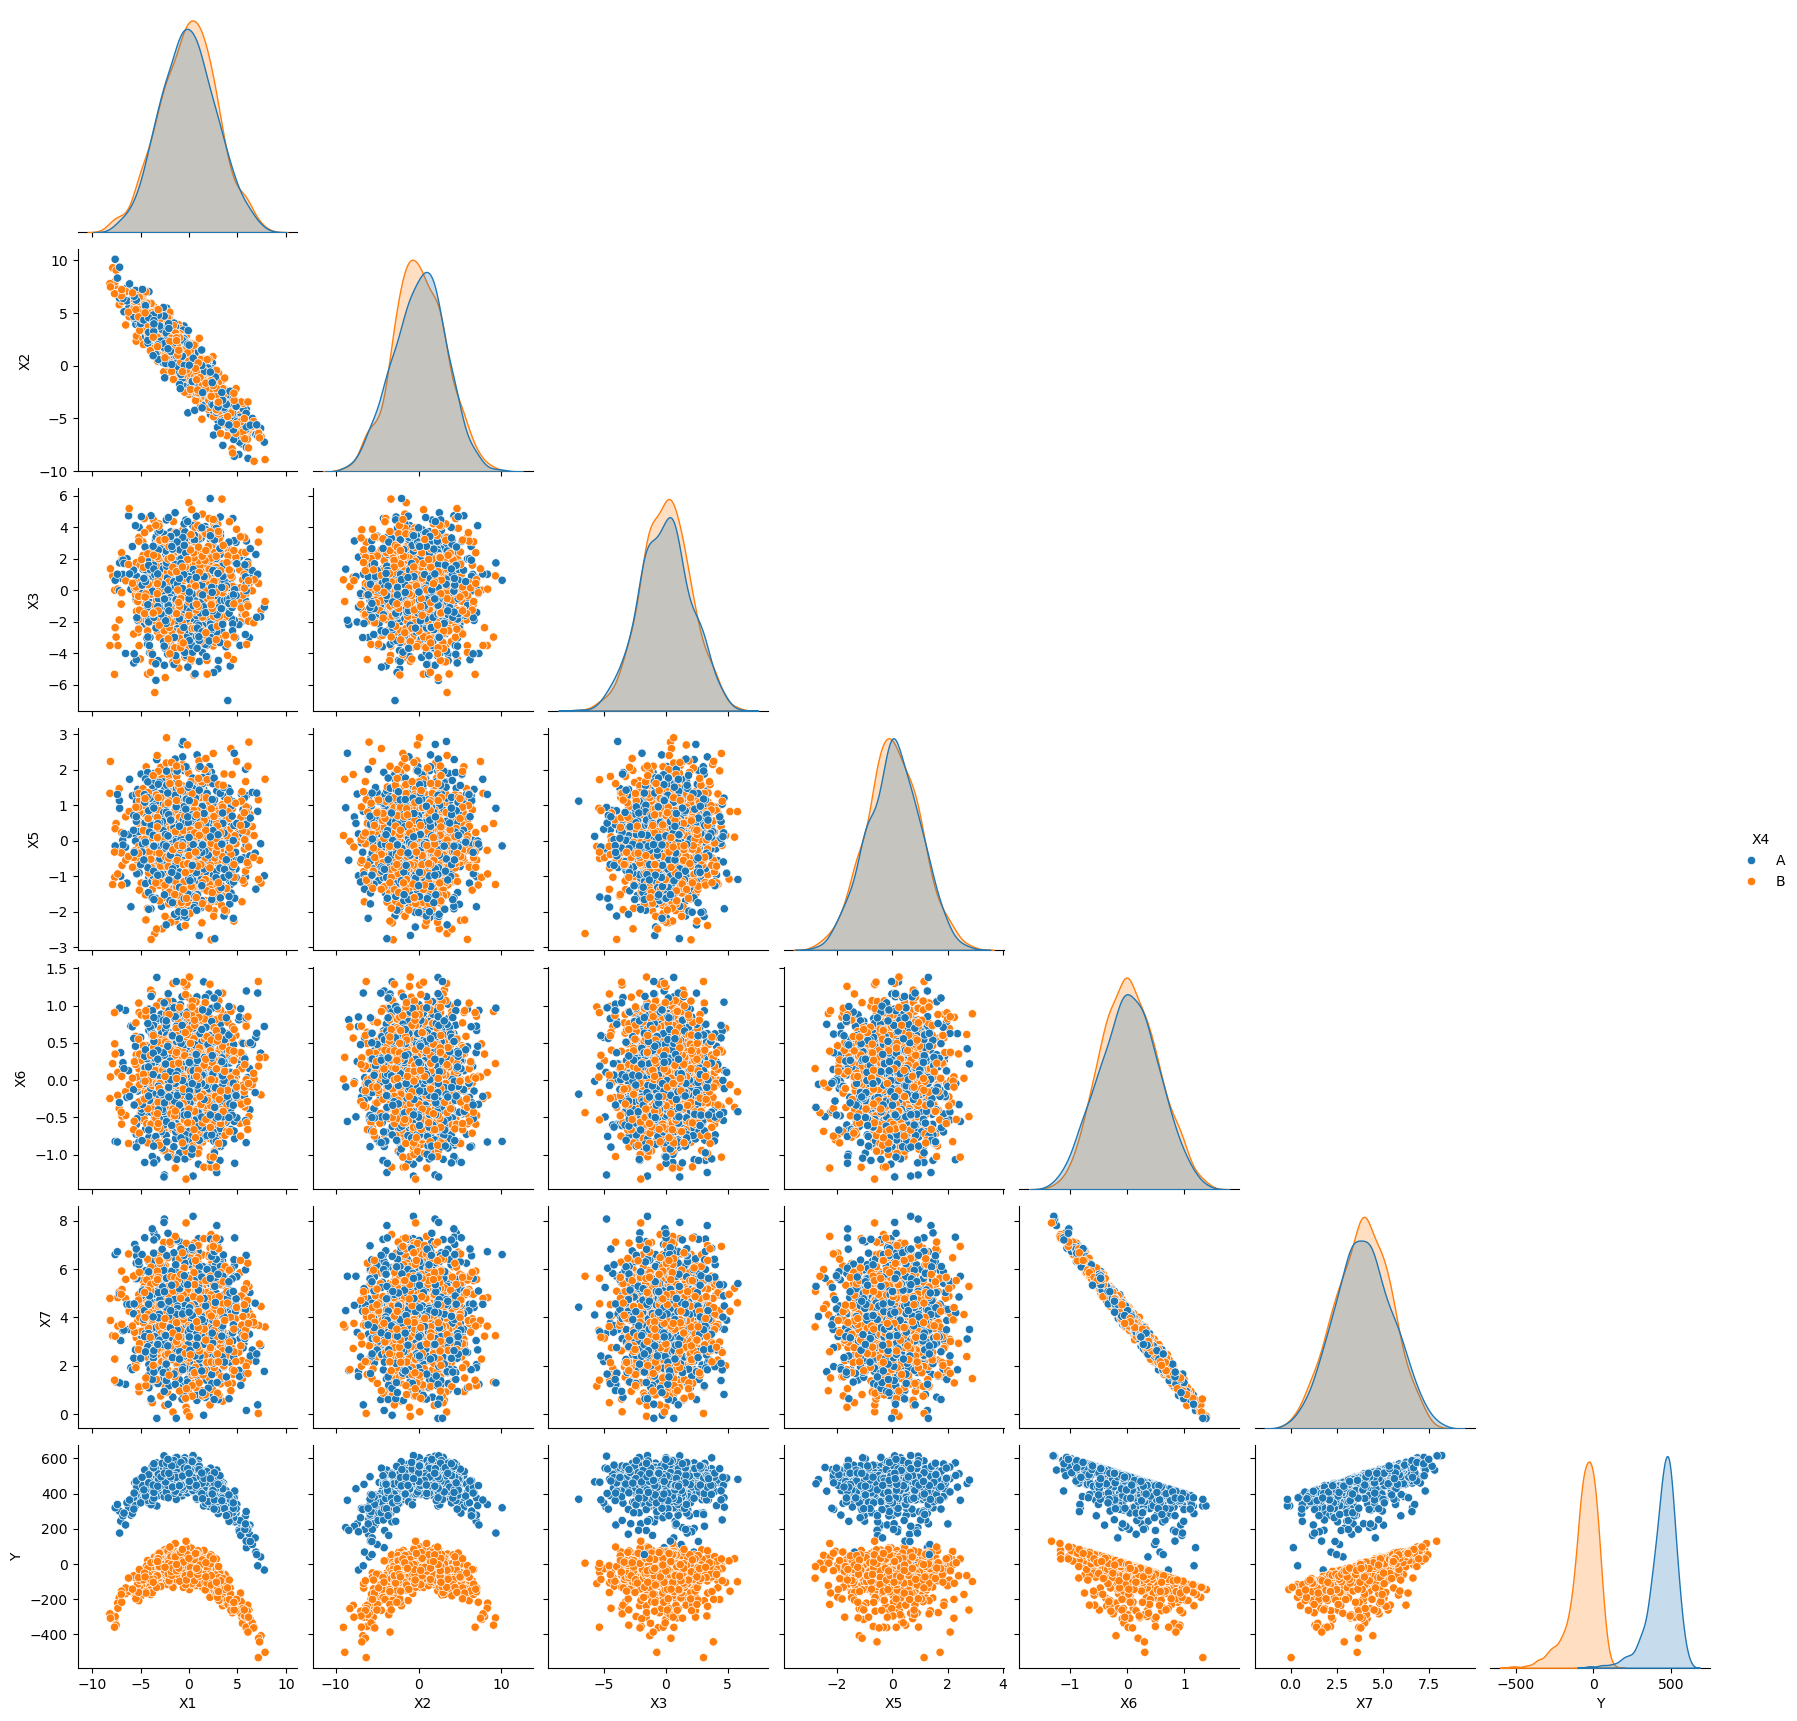

In [21]:
show_pairplot = True
if show_pairplot:
    sns.pairplot(dfTR, corner=True, hue="X4")

In [22]:
XTR = dfTR[inputs]
YTR = dfTR[output]
XTS = dfTS[inputs]
YTS = dfTS[output]


In [23]:
XTR.head()

X1        X2        X3 X4        X5        X6        X7
0 -1.915193  0.912981 -0.348239  A -0.290183  0.011066  3.891507
1  1.059666 -0.662881  1.814415  B -0.158088 -0.518349  5.225697
2 -0.971432  1.606014 -1.591034  A -0.974238 -0.977556  7.125767
3  1.585106 -0.909197 -1.525660  B -1.287262  0.302834  2.909391
4 -1.772418  2.705041 -0.496650  A  1.519974  0.123994  3.837321

In [24]:
XTR[num_inputs].corr()

X1        X2        X3        X5        X6        X7
X1  1.000000 -0.924199  0.036984 -0.024035  0.022283 -0.024998
X2 -0.924199  1.000000 -0.035639  0.029923 -0.025351  0.027374
X3  0.036984 -0.035639  1.000000  0.043712 -0.043017  0.042551
X5 -0.024035  0.029923  0.043712  1.000000 -0.009364  0.013791
X6  0.022283 -0.025351 -0.043017 -0.009364  1.000000 -0.991172
X7 -0.024998  0.027374  0.042551  0.013791 -0.991172  1.000000

In [25]:
num_inputs = XTR[num_inputs].columns.drop(["X2", "X7"]).tolist() 
num_inputs


['X1', 'X3', 'X5', 'X6']

In [26]:
inputs = num_inputs + cat_inputs
XTR = XTR[num_inputs + cat_inputs]
XTS = XTS[num_inputs + cat_inputs]

In [27]:
XTR.head()

X1        X3        X5        X6 X4
0 -1.915193 -0.348239 -0.290183  0.011066  A
1  1.059666  1.814415 -0.158088 -0.518349  B
2 -0.971432 -1.591034 -0.974238 -0.977556  A
3  1.585106 -1.525660 -1.287262  0.302834  B
4 -1.772418 -0.496650  1.519974  0.123994  A

In [28]:
XTS.head()

X1        X3        X5        X6 X4
0  1.869682 -3.125636 -1.004135 -0.306245  B
1 -0.304051 -0.390383  0.565398  0.505746  B
2  1.650292 -2.618312  0.895907  0.112306  B
3  5.750396 -3.003478 -2.484520  0.369524  B
4 -3.251399  1.324038  0.716623 -0.116109  B

In [29]:
model_Formula = " + ".join(inputs)
model_Formula

'X1 + X3 + X5 + X6 + X4'

In [30]:
lm_pipeline = Pipeline([
("formula", FormulaTransformer(model_Formula)),
("regressor", StatsModelsRegressor(OLS, fit_intercept = False))])

In [31]:
lm_pipeline.fit(dfTR[inputs], dfTR[output])

model = lm_pipeline
model._final_estimator

StatsModelsRegressor(fit_intercept=False,
                     model_class=<class 'statsmodels.regression.linear_model.OLS'>)

In [32]:
print(model._final_estimator.results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     4714.
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:41:58   Log-Likelihood:                -8815.8
No. Observations:                1568   AIC:                         1.764e+04
Df Residuals:                    1562   BIC:                         1.768e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    445.8945      2.431    183.390      0.0

#### 1.2.2. Scores for this model

*Obtain the training, test and validation scores for this model. Store them in a model dictionary like we have done in the course sessions.*

In [33]:
model_train_rmse = np.sqrt(mean_squared_error(YTR, model.predict(XTR)))
model_test_rmse = np.sqrt(mean_squared_error(YTS, model.predict(XTS)))
model_train_rmse, model_test_rmse

(np.float64(66.91087970372483), np.float64(87.28248521528816))

In [34]:
model_validation_scores = - cross_val_score(model, dfTR[inputs], dfTR[output], cv=10, scoring="neg_root_mean_squared_error")
model_validation_scores

array([73.16574299, 71.4472021 , 58.60642062, 69.94237733, 70.18342614,
       67.32376469, 77.65935138, 56.915566  , 65.61947592, 61.96681415])

In [35]:
modelDict = {}

model_name = "lm"

modelDict[model_name] = {'model': model}
modelDict[model_name]["model_train_rmse"] = model_train_rmse
modelDict[model_name]["model_test_rmse"] = model_test_rmse
modelDict[model_name]["validation_scores"] = model_validation_scores
modelDict[model_name]["model_test_prediction"] = model.predict(XTS)


--------------------------------------------------
Density Curve and QQ-plot of Residuals: ['X1', 'X3', 'X5', 'X6']
--------------------------------------------------
[<Axes: > <Axes: >]


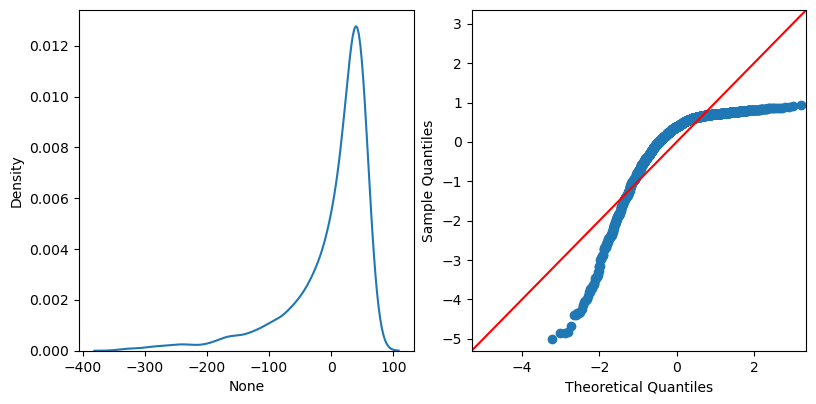

--------------------------------------------------
Fitted Values vs Residuals:
--------------------------------------------------


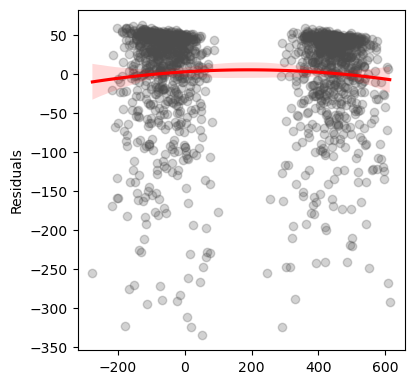

--------------------------------------------------
Numerical inputs: ['X1', 'X3', 'X5', 'X6']
--------------------------------------------------


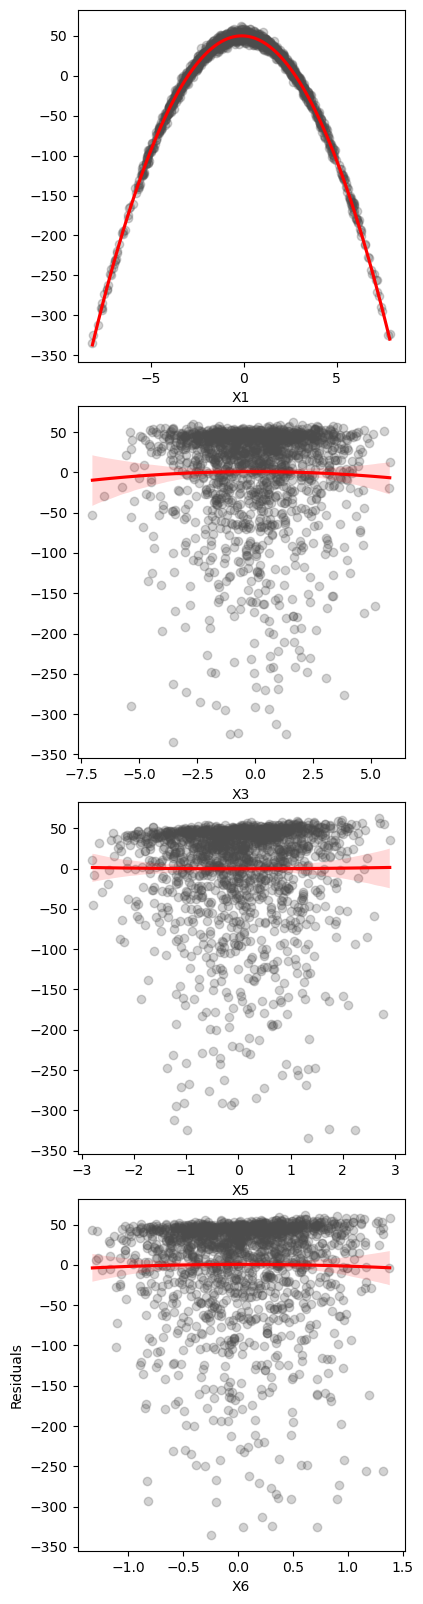

--------------------------------------------------
Categorical inputs: ['X4']
--------------------------------------------------


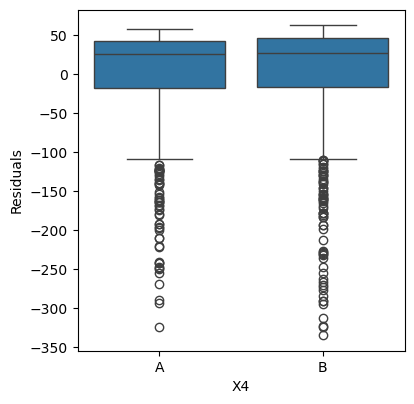

In [36]:
ResidualPlots(model=model._final_estimator, data=dfTR[inputs + [output]], num_inputs=num_inputs, cat_inputs=cat_inputs, output=output)

### Second Linear Model with Quadratic Terms

In [37]:
model2_Formula = "X1 + I(X1**2) + X4 + X6:X4"
model2_Formula

'X1 + I(X1**2) + X4 + X6:X4'

In [38]:
lm2_pipeline = Pipeline([
("formula", FormulaTransformer(model2_Formula)),
("regressor", StatsModelsRegressor(OLS, fit_intercept = False))])

In [39]:
lm2_pipeline.fit(dfTR[inputs], dfTR[output])

model = lm2_pipeline
model._final_estimator

StatsModelsRegressor(fit_intercept=False,
                     model_class=<class 'statsmodels.regression.linear_model.OLS'>)

In [40]:
print(model._final_estimator.results_.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.388e+09
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        11:41:59   Log-Likelihood:                 1432.0
No. Observations:                1568   AIC:                            -2852.
Df Residuals:                    1562   BIC:                            -2820.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    494.0069      0.004   1.25e+05      0.0

In [41]:
model_train_rmse = np.sqrt(mean_squared_error(YTR, model.predict(XTR)))
model_test_rmse = np.sqrt(mean_squared_error(YTS, model.predict(XTS)))
model_train_rmse, model_test_rmse

(np.float64(0.09708432130039722), np.float64(0.09722582403351111))

In [42]:
model_validation_scores = - cross_val_score(model, dfTR[inputs], dfTR[output], cv=10, scoring="neg_root_mean_squared_error")
model_validation_scores

array([0.09465134, 0.09874717, 0.09365427, 0.10082398, 0.08732854,
       0.09921214, 0.10492782, 0.09407362, 0.1024112 , 0.0976964 ])

In [43]:
model_name = "lm_quad"

modelDict[model_name] = {'model': model}
modelDict[model_name]["model_train_rmse"] = model_train_rmse
modelDict[model_name]["model_test_rmse"] = model_test_rmse
modelDict[model_name]["validation_scores"] = model_validation_scores
modelDict[model_name]["model_test_prediction"] = model.predict(XTS)


--------------------------------------------------
Density Curve and QQ-plot of Residuals: ['X1', 'X3', 'X5', 'X6']
--------------------------------------------------
[<Axes: > <Axes: >]


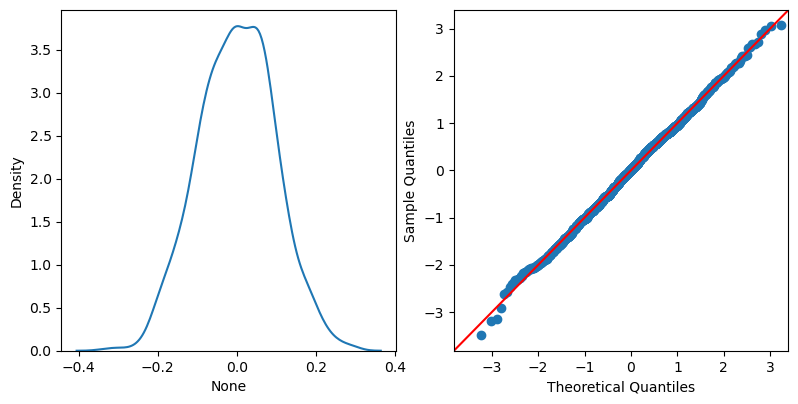

--------------------------------------------------
Fitted Values vs Residuals:
--------------------------------------------------


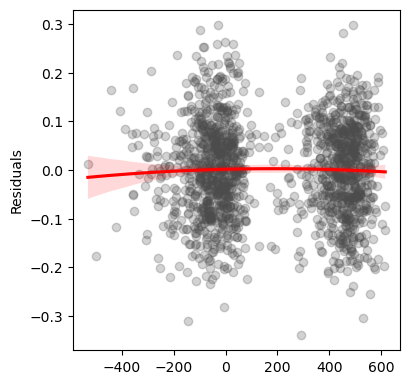

--------------------------------------------------
Numerical inputs: ['X1', 'X3', 'X5', 'X6']
--------------------------------------------------


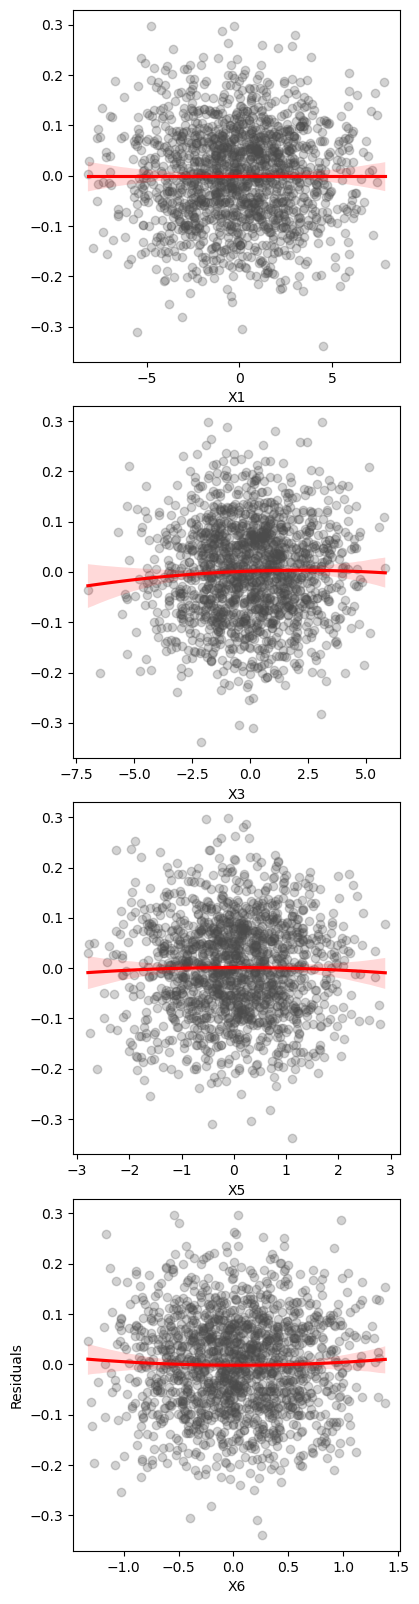

--------------------------------------------------
Categorical inputs: ['X4']
--------------------------------------------------


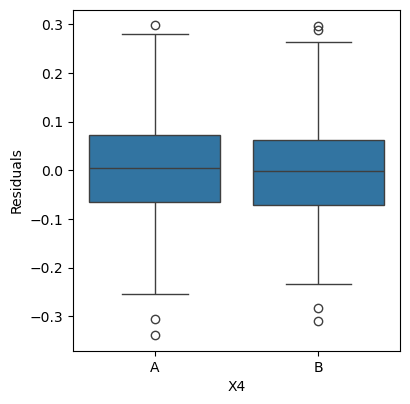

In [44]:
ResidualPlots(model=model._final_estimator, data=dfTR[inputs + [output]], num_inputs=num_inputs, cat_inputs=cat_inputs, output=output)

In [45]:
modelDict

{'lm': {'model': Pipeline(steps=[('formula',
                   FormulaTransformer(formula='X1 + X3 + X5 + X6 + X4')),
                  ('regressor',
                   StatsModelsRegressor(fit_intercept=False,
                                        model_class=<class 'statsmodels.regression.linear_model.OLS'>))]),
  'model_train_rmse': np.float64(66.91087970372483),
  'model_test_rmse': np.float64(87.28248521528816),
  'validation_scores': array([73.16574299, 71.4472021 , 58.60642062, 69.94237733, 70.18342614,
         67.32376469, 77.65935138, 56.915566  , 65.61947592, 61.96681415]),
  'model_test_prediction': 0      -41.658080
  1     -108.503005
  2      -88.629620
  3     -149.359867
  4      -12.977809
            ...    
  395   -104.400626
  396      2.544067
  397    -65.976101
  398   -138.995793
  399     43.328487
  Length: 400, dtype: float64},
 'lm_quad': {'model': Pipeline(steps=[('formula',
                   FormulaTransformer(formula='X1 + I(X1**2) + X4 + X6:X4')),


### (OPTIONAL) Lasso


In [46]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler().set_output(transform="pandas"))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_inputs),
        ('cat', 'passthrough', cat_inputs)
        ])
preprocessor.set_output(transform='pandas')
preprocessor.fit_transform(XTR)

model_Formula = " + ".join(["num__"+ item for item in num_inputs] + ["cat__"+ item for item in cat_inputs]) 
model_Formula = model_Formula + " - 1" 
# model_Formula = model_Formula + " - 1" + " + I(num__X1**2)"
model_Formula


'num__X1 + num__X3 + num__X5 + num__X6 + cat__X4 - 1'

We use `alpha` as a hyperparameter for the Lasso pipeline. 

In [47]:
logScale = True
if logScale:
    Lasso_alphas = np.logspace(-5, 5, 51)
else:
    Lasso_alphas = np.linspace(0.001, 0.01, 21)


In [48]:
Lasso_alphas

array([1.00000000e-05, 1.58489319e-05, 2.51188643e-05, 3.98107171e-05,
       6.30957344e-05, 1.00000000e-04, 1.58489319e-04, 2.51188643e-04,
       3.98107171e-04, 6.30957344e-04, 1.00000000e-03, 1.58489319e-03,
       2.51188643e-03, 3.98107171e-03, 6.30957344e-03, 1.00000000e-02,
       1.58489319e-02, 2.51188643e-02, 3.98107171e-02, 6.30957344e-02,
       1.00000000e-01, 1.58489319e-01, 2.51188643e-01, 3.98107171e-01,
       6.30957344e-01, 1.00000000e+00, 1.58489319e+00, 2.51188643e+00,
       3.98107171e+00, 6.30957344e+00, 1.00000000e+01, 1.58489319e+01,
       2.51188643e+01, 3.98107171e+01, 6.30957344e+01, 1.00000000e+02,
       1.58489319e+02, 2.51188643e+02, 3.98107171e+02, 6.30957344e+02,
       1.00000000e+03, 1.58489319e+03, 2.51188643e+03, 3.98107171e+03,
       6.30957344e+03, 1.00000000e+04, 1.58489319e+04, 2.51188643e+04,
       3.98107171e+04, 6.30957344e+04, 1.00000000e+05])

In [49]:
Lasso_pipe = Pipeline([
            ('preprocessor', preprocessor),
            ("formula", FormulaTransformer(model_Formula)),
            ('Lasso', Lasso())])
Lasso_pipe.fit(XTR, YTR)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['X1', 'X3', 'X5', 'X6']),
                                                 ('cat', 'passthrough',
                                                  ['X4'])])),
                ('formula',
                 FormulaTransformer(formula='num__X1 + num__X3 + num__X5 + '
                                            'num__X6 + cat__X4 - 1')),
                ('Lasso', Lasso())])

In [50]:
Lasso_hyp_grid = {'Lasso__alpha': Lasso_alphas}

Lasso_grid = GridSearchCV(estimator=Lasso_pipe, 
                       param_grid=Lasso_hyp_grid, 
                       n_jobs=-1,  
                       scoring='neg_mean_squared_error',  
                       cv=10) 

Lasso_grid.fit(XTR, YTR)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['X1',
                                                                          'X3',
                                                                          'X5',
                                                                          'X6']),
                                                                        ('cat',
                                                                         'passthrough',
                                                                         ['X4'])])),
                                       ('formula',
                                        FormulaTransformer(formula='num__X1 + '
                                                                   'num__X3 + '
                                                                   'num__X5 + '
                                                                   'num__X6 + '
                                                                   'cat__X4 - '
                                                                   '1')),
                                       ('Lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'Lasso__alpha...
       3.98107171e+00, 6.30957344e+00, 1.00000000e+01, 1.58489319e+01,
       2.51188643e+01, 3.98107171e+01, 6.30957344e+01, 1.00000000e+02,
       1.58489319e+02, 2.51188643e+02, 3.98107171e+02, 6.30957344e+02,
       1.00000000e+03, 1.58489319e+03, 2.51188643e+03, 3.98107171e+03,
       6.30957344e+03, 1.00000000e+04, 1.58489319e+04, 2.51188643e+04,
       3.98107171e+04, 6.30957344e+04, 1.00000000e+05])},
             scoring='neg_mean_squared_error')

In [51]:
coefs = Lasso_grid.best_estimator_["Lasso"].coef_
coefs

array([ 5.01677703e+02, -0.00000000e+00, -3.03620559e+01, -9.47649823e-02,
       -2.38023714e+00, -5.20771197e+01])

In [52]:
vars = Lasso_pipe[:2].fit_transform(XTR).columns
vars

Index(['cat__X4[A]', 'cat__X4[B]', 'num__X1', 'num__X3', 'num__X5', 'num__X6'], dtype='object')

In [53]:
selected_vars = [vars[k] for k, x in enumerate(vars) if x != 0]
selected_vars

['cat__X4[A]', 'cat__X4[B]', 'num__X1', 'num__X3', 'num__X5', 'num__X6']

In [54]:
model_name = "Lasso"
model = Lasso_grid

In [55]:
model_train_rmse = np.sqrt(mean_squared_error(YTR, model.predict(XTR)))
model_test_rmse = np.sqrt(mean_squared_error(YTS, model.predict(XTS)))
model_train_rmse, model_test_rmse

(np.float64(66.92019029104277), np.float64(87.34286554584409))

In [56]:
model_validation_scores = (np.sqrt(-cross_val_score(model, XTR, YTR, cv=10, scoring="neg_mean_squared_error"))).tolist()
model_validation_scores

[73.08697046145265,
 71.4312081171941,
 58.45310730471262,
 70.1520763449776,
 70.41779800247708,
 67.44643765908309,
 77.26358744374805,
 57.099056725959684,
 65.61947337648633,
 61.97766132892851]

In [57]:
model_name = "Lasso"

modelDict[model_name] = {'model': model}
modelDict[model_name]["model_train_rmse"] = model_train_rmse
modelDict[model_name]["model_test_rmse"] = model_test_rmse
modelDict[model_name]["validation_scores"] = model_validation_scores
modelDict[model_name]["model_test_prediction"] = model.predict(XTS)


# Regression Part II

+ For this second part we **strongly recommend** you to organize your work using the results in session 3_3 of the course. 
+ In particular we recommend that you start with a fresh version of the data sets, by reloading them. 
+ To speed up your work keep in mind that this is the same dataset, so you should already have gone through EDA. Do not repeat the same EDA analysis, use it!
+ We also advise you to keep the same model dictionary for easy model comparison.

In [58]:
dfTR = pd.read_csv("./dfTR_reg_02.csv")
dfTS = pd.read_csv("./dfTS_reg_02.csv")
dfTR.head()

X1        X2        X3 X4        X5        X6        X7           Y
0 -1.915193  0.912981 -0.348239  A -0.290183  0.011066  3.891507  493.865712
1  1.059666 -0.662881  1.814415  B -0.158088 -0.518349  5.225697   26.363208
2 -0.971432  1.606014 -1.591034  A -0.974238 -0.977556  7.125767  597.776134
3  1.585106 -0.909197 -1.525660  B -1.287262  0.302834  2.909391  -70.329943
4 -1.772418  2.705041 -0.496650  A  1.519974  0.123994  3.837321  484.151054

### 1.3. Gradient Boosting regression

*Fit a gradient boosting regression model for the training dataset*

In [59]:
def remove_outliers(X, method="iqr", threshold=1.5):
    if isinstance(X, pd.DataFrame):
        X = X.copy()  # Avoid modifying the original DataFrame
        columns = X.columns  # Save column names
        idx = X.index  # Save row index
        X_values = X.values  # Work on raw numpy array

    else:
        return X  # If not a DataFrame, return as is

    if method == "iqr":
        Q1 = np.nanpercentile(X_values, 25, axis=0)
        Q3 = np.nanpercentile(X_values, 75, axis=0)
        IQR = Q3 - Q1
        mask = (X_values >= Q1 - threshold * IQR) & (X_values <= Q3 + threshold * IQR)
    elif method == "std":
        mean = np.nanmean(X_values, axis=0)
        std = np.nanstd(X_values, axis=0)
        mask = (X_values >= mean - threshold * std) & (X_values <= mean + threshold * std)
    else:
        return X  # If the method is not valid, return without changes

    X_values = np.where(mask, X_values, np.nan)  # Convert outliers to NaN
    return pd.DataFrame(X_values, columns=columns, index=idx)  # Convert back to DataFrame


In [60]:
def create_outlier_transformer(threshold=1.5, method="iqr", use_outlier_removal = True):
    if use_outlier_removal:
         return FunctionTransformer(lambda X: remove_outliers(X, method=method, threshold=threshold))
    else:
        return FunctionTransformer(lambda X: X)

# Create the transformer with an initial threshold
outlier_remover = create_outlier_transformer(threshold=1.5, use_outlier_removal = True)
outlier_remover.set_output(transform='pandas')


FunctionTransformer(func=<function create_outlier_transformer.<locals>.<lambda> at 0xffff1b578a40>)

In [61]:
remove_outliers_in = ["X1", "X6"]

outlier_removal = ColumnTransformer(
    transformers=[("outlier_remover", outlier_remover, remove_outliers_in)],
    remainder="passthrough", 
    force_int_remainder_cols=False)
outlier_removal.set_output(transform='pandas')

ColumnTransformer(force_int_remainder_cols=False, remainder='passthrough',
                  transformers=[('outlier_remover',
                                 FunctionTransformer(func=<function create_outlier_transformer.<locals>.<lambda> at 0xffff1b578a40>),
                                 ['X1', 'X6'])])

In [62]:
preproc_pipeline = Pipeline([
    ("remove_outliers", outlier_removal)
])

preproc_pipeline.set_output(transform='pandas')

Pipeline(steps=[('remove_outliers',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('outlier_remover',
                                                  FunctionTransformer(func=<function create_outlier_transformer.<locals>.<lambda> at 0xffff1b578a40>),
                                                  ['X1', 'X6'])]))])

In [63]:
class ColumnNameCleaner(BaseEstimator, TransformerMixin):
    def __init__(self, separator="__"):
        self.separator = separator
        self._output_format = 'pandas'  # Default output format


    def fit(self, X, y=None):
        return self  # Nothing to learn, just transforming

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            # Remove prefix up to the separator "__"
            new_columns = [col.split(self.separator, 1)[-1] if self.separator in col else col for col in X.columns]
            X = X.copy()
            X.columns = new_columns
        return X

    def set_output(self, transform='pandas'):
        """Allows the user to choose the output format for the transformer."""
        if transform not in ['array', 'pandas']:
            raise ValueError("Output format must be 'array' or 'pandas'")
        self._output_format = transform

In [64]:
new_step = ("outliers_name_cleanup", ColumnNameCleaner())
preproc_pipeline = Pipeline(preproc_pipeline.steps + [new_step])
preproc_pipeline

Pipeline(steps=[('remove_outliers',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('outlier_remover',
                                                  FunctionTransformer(func=<function create_outlier_transformer.<locals>.<lambda> at 0xffff1b578a40>),
                                                  ['X1', 'X6'])])),
                ('outliers_name_cleanup', ColumnNameCleaner())])

In [65]:
XTR_transf = preproc_pipeline.fit_transform(XTR)
XTR_transf


X1        X6        X3        X5 X4
0    -1.915193  0.011066 -0.348239 -0.290183  A
1     1.059666 -0.518349  1.814415 -0.158088  B
2    -0.971432 -0.977556 -1.591034 -0.974238  A
3     1.585106  0.302834 -1.525660 -1.287262  B
4    -1.772418  0.123994 -0.496650  1.519974  A
...        ...       ...       ...       ... ..
1595 -2.071451 -0.225273 -1.314800 -1.106835  A
1596  6.142623 -0.044350  0.599693 -0.179530  B
1597 -3.250118 -0.449281  0.407731  0.084957  B
1598  0.033808  0.238413 -0.120602  1.125384  A
1599  2.204540 -0.465641  3.448035  0.106380  A

[1568 rows x 5 columns]

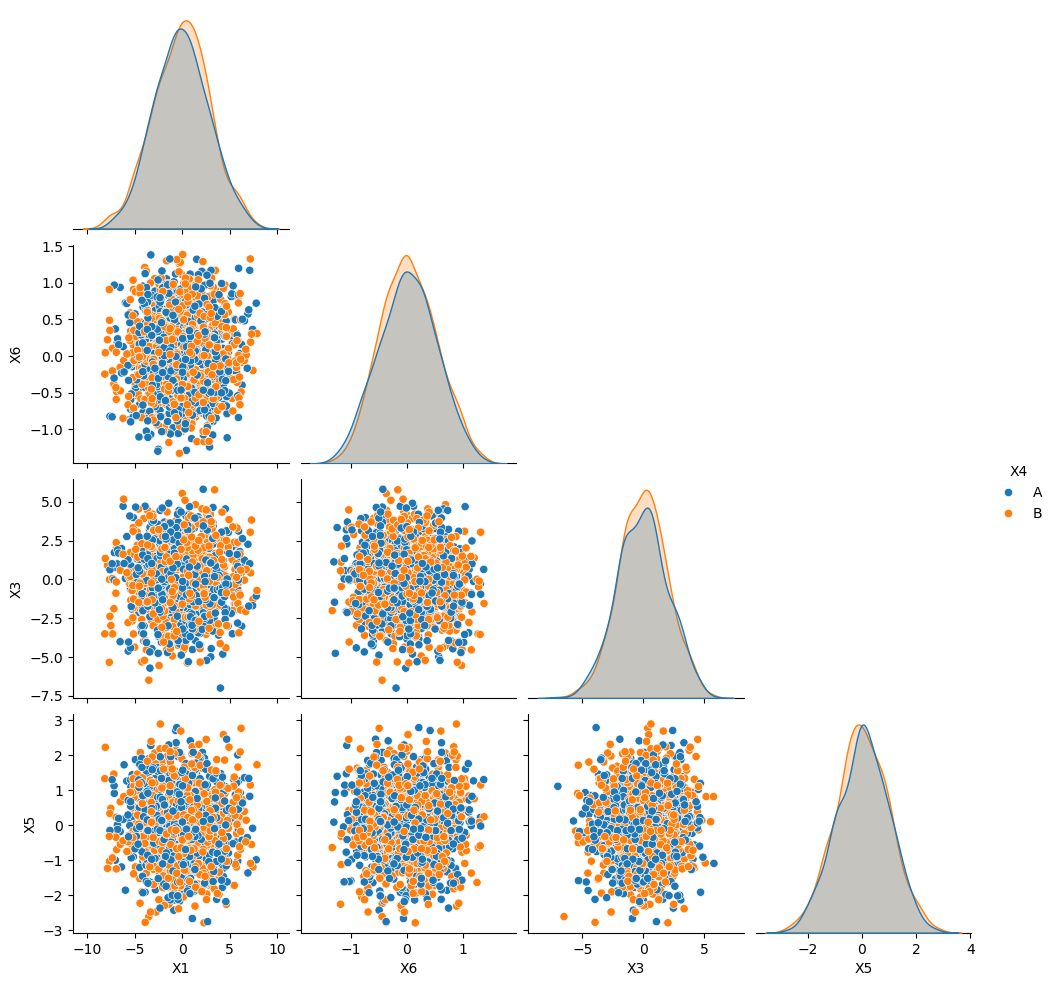

In [66]:
show_pairplot = True
if show_pairplot:
    sns.pairplot(XTR_transf, corner=True, hue="X4")

In [67]:
XTR_transf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1568 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1568 non-null   float64
 1   X6      1568 non-null   float64
 2   X3      1568 non-null   float64
 3   X5      1568 non-null   float64
 4   X4      1568 non-null   object 
dtypes: float64(4), object(1)
memory usage: 73.5+ KB


In [68]:
dfTR_transf = XTR_transf.copy()
dfTR_transf[output] = dfTR[output]
show_pairplot = False
if show_pairplot:
    sns.pairplot(XTR_transf, corner=True, hue="X4")

In [69]:
dfTR.drop(columns=["X2", "X7"], inplace=True)
dfTS.drop(columns=["X2", "X7"], inplace=True)

inputs = dfTR.columns.drop(output).tolist()
cat_inputs = ["X4"]
num_inputs = dfTR.columns.drop(output).drop(cat_inputs).tolist()
inputs, num_inputs, cat_inputs
XTR = dfTR[inputs]
YTR = dfTR[output]
XTS = dfTS[inputs]
YTS = dfTS[output]

inputs, num_inputs, cat_inputs


(['X1', 'X3', 'X4', 'X5', 'X6'], ['X1', 'X3', 'X5', 'X6'], ['X4'])

In [70]:
from sklearn.impute import SimpleImputer

num_imputer = (SimpleImputer(strategy="median"))
num_imputer.set_output(transform='pandas')

cat_imputer = SimpleImputer(strategy="most_frequent")
cat_imputer.set_output(transform='pandas')

SimpleImputer(strategy='most_frequent')

In [71]:
imputer = ColumnTransformer([
    ("num_imputer", num_imputer, num_inputs),
    ("cat_imputer", cat_imputer, cat_inputs)
])

imputer.set_output(transform='pandas'); # the semicolon suppresses the output diagram, that we will see below

In [72]:
new_steps = [("imputer", imputer), ("imputer_name_cleanup", ColumnNameCleaner())]
preproc_pipeline = Pipeline(preproc_pipeline.steps + new_steps)
preproc_pipeline

Pipeline(steps=[('remove_outliers',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('outlier_remover',
                                                  FunctionTransformer(func=<function create_outlier_transformer.<locals>.<lambda> at 0xffff1b578a40>),
                                                  ['X1', 'X6'])])),
                ('outliers_name_cleanup', ColumnNameCleaner()),
                ('imputer',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  SimpleImputer(strategy='median'),
                                                  ['X1', 'X3', 'X5', 'X6']),
                                                 ('cat_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['X4'])])),
                ('imputer_name_cleanup', ColumnNameCleaner())])

In [73]:
XTR_transf = preproc_pipeline.fit_transform(XTR)
XTR_transf


X1        X3        X5        X6 X4
0    -1.915193 -0.348239 -0.290183  0.011066  A
1     1.059666  1.814415 -0.158088 -0.518349  B
2    -0.971432 -1.591034 -0.974238 -0.977556  A
3     1.585106 -1.525660 -1.287262  0.302834  B
4    -1.772418 -0.496650  1.519974  0.123994  A
...        ...       ...       ...       ... ..
1595 -2.071451 -1.314800 -1.106835 -0.225273  A
1596  6.142623  0.599693 -0.179530 -0.044350  B
1597 -3.250118  0.407731  0.084957 -0.449281  B
1598  0.033808 -0.120602  1.125384  0.238413  A
1599  2.204540  3.448035  0.106380 -0.465641  A

[1600 rows x 5 columns]

In [74]:
XTR_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1600 non-null   float64
 1   X3      1600 non-null   float64
 2   X5      1600 non-null   float64
 3   X6      1600 non-null   float64
 4   X4      1600 non-null   object 
dtypes: float64(4), object(1)
memory usage: 62.6+ KB


In [75]:
ohe = OneHotEncoder(sparse_output=False, drop="first")
ohe.set_output(transform='pandas')  

encoder = ColumnTransformer([("ohe", ohe, cat_inputs)],
                            remainder="passthrough")
encoder.set_output(transform='pandas')

new_steps = [("encoder", encoder),
             ("encoder_name_cleanup", ColumnNameCleaner())]

preproc_pipeline = Pipeline(preproc_pipeline.steps + new_steps)


In [76]:
preproc_pipeline.fit_transform(XTR)

X4_B        X1        X3        X5        X6
0      0.0 -1.915193 -0.348239 -0.290183  0.011066
1      1.0  1.059666  1.814415 -0.158088 -0.518349
2      0.0 -0.971432 -1.591034 -0.974238 -0.977556
3      1.0  1.585106 -1.525660 -1.287262  0.302834
4      0.0 -1.772418 -0.496650  1.519974  0.123994
...    ...       ...       ...       ...       ...
1595   0.0 -2.071451 -1.314800 -1.106835 -0.225273
1596   1.0  6.142623  0.599693 -0.179530 -0.044350
1597   1.0 -3.250118  0.407731  0.084957 -0.449281
1598   0.0  0.033808 -0.120602  1.125384  0.238413
1599   0.0  2.204540  3.448035  0.106380 -0.465641

[1600 rows x 5 columns]

In [77]:
def create_scaler(use_scaler = True):
    if use_scaler:
         return StandardScaler()
    else:
        return FunctionTransformer(lambda X: X)

# Create the transformer with an initial threshold
scaler = create_scaler(use_scaler = True)
scaler.set_output(transform='pandas')


StandardScaler()

In [78]:
scaling = ColumnTransformer([
    ("scaler", scaler, num_inputs)
],
    remainder="passthrough")
scaling.set_output(transform='pandas')

new_steps = [("scaler", scaling),
             ("scaler_name_cleanup", ColumnNameCleaner())]

preproc_pipeline = Pipeline(preproc_pipeline.steps + new_steps)


In [79]:
preproc_pipeline.fit_transform(XTR)

X1        X3        X5        X6  X4_B
0    -0.636227 -0.161800 -0.325808 -0.040254   0.0
1     0.400212  0.909484 -0.189924 -1.101301   1.0
2    -0.307422 -0.777427 -1.029487 -2.021639   0.0
3     0.583275 -0.745043 -1.351490  0.544504   1.0
4    -0.586485 -0.235317  1.536275  0.186076   0.0
...        ...       ...       ...       ...   ...
1595 -0.690668 -0.640592 -1.165887 -0.513922   0.0
1596  2.171112  0.307764 -0.211982 -0.151319   1.0
1597 -1.101315  0.212675  0.060093 -0.962876   1.0
1598  0.042804 -0.049039  1.130365  0.415393   0.0
1599  0.799086  1.718708  0.082131 -0.995665   0.0

[1600 rows x 5 columns]

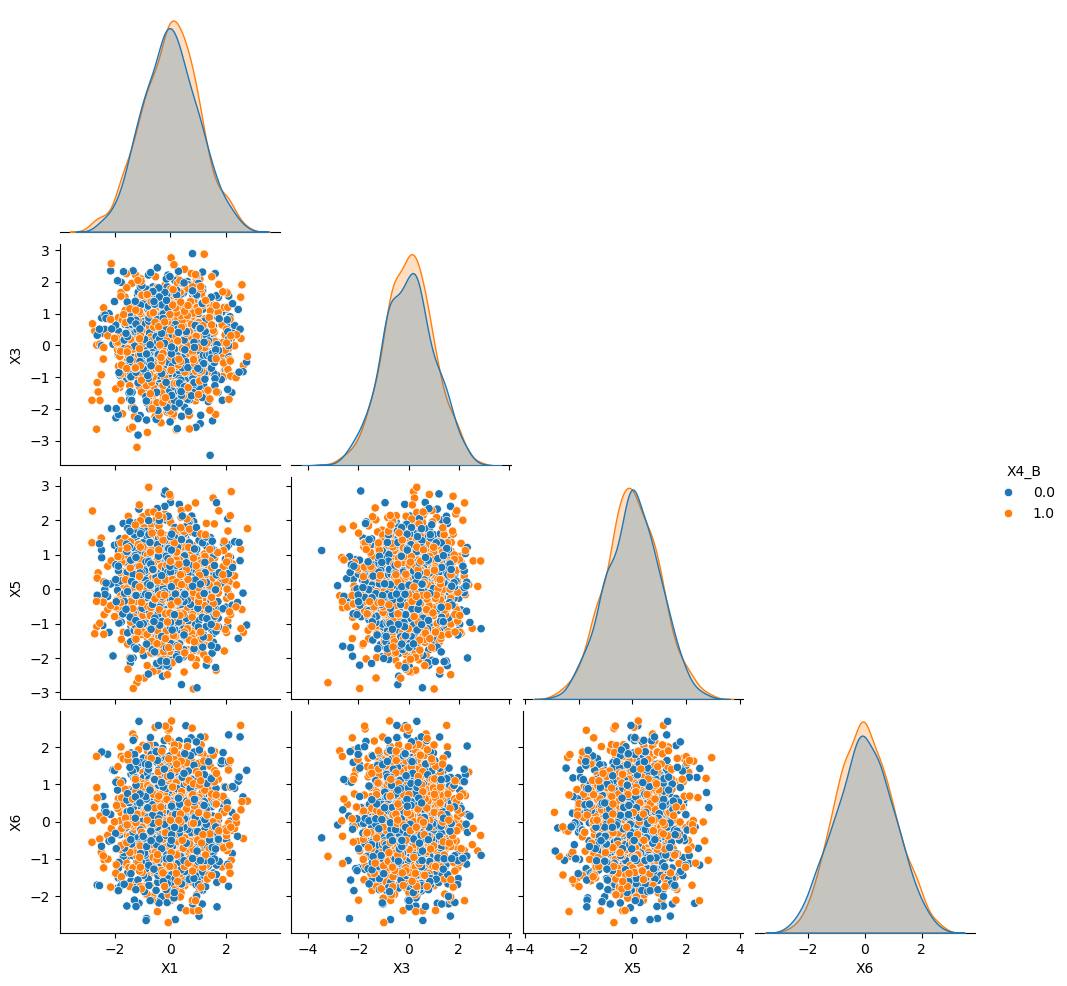

In [80]:
show_pairplot = True
if show_pairplot:
    sns.pairplot(preproc_pipeline.fit_transform(XTR), corner=True, hue="X4_B")

In [81]:
# Leave the list of variables empty to skip this step
poly_vars = ["X1"]
poly_degrees = [2]

column_transformations = []
for var, degree in zip(poly_vars, poly_degrees):
    var_polfeat = PolynomialFeatures(degree=degree, include_bias=False)
    var_polfeat.set_output(transform='pandas')
    # Here we need a list for the last argument, otherwise it will be considered as a string
    # and pandas in its infinite wisdom will return a Series instead of a DataFrame 
    new_col_transformer = (f"poly_{var}", var_polfeat, [var]) 
    column_transformations.append(new_col_transformer)
    
column_transformations

[('poly_X1', PolynomialFeatures(include_bias=False), ['X1'])]

In [82]:
polyterms_transform = ColumnTransformer(column_transformations, remainder="passthrough")
polyterms_transform.set_output(transform='pandas')
polyterms_transform


new_steps = [("add_polyterms", polyterms_transform), 
             ("name_cleanup_polyterms", ColumnNameCleaner())]
preproc_pipeline = Pipeline(preproc_pipeline.steps + new_steps)



In [83]:
preproc_pipeline.fit_transform(XTR)

X1      X1^2        X3        X5        X6  X4_B
0    -0.636227  0.404785 -0.161800 -0.325808 -0.040254   0.0
1     0.400212  0.160170  0.909484 -0.189924 -1.101301   1.0
2    -0.307422  0.094508 -0.777427 -1.029487 -2.021639   0.0
3     0.583275  0.340210 -0.745043 -1.351490  0.544504   1.0
4    -0.586485  0.343965 -0.235317  1.536275  0.186076   0.0
...        ...       ...       ...       ...       ...   ...
1595 -0.690668  0.477022 -0.640592 -1.165887 -0.513922   0.0
1596  2.171112  4.713729  0.307764 -0.211982 -0.151319   1.0
1597 -1.101315  1.212895  0.212675  0.060093 -0.962876   1.0
1598  0.042804  0.001832 -0.049039  1.130365  0.415393   0.0
1599  0.799086  0.638538  1.718708  0.082131 -0.995665   0.0

[1600 rows x 6 columns]

In [84]:
XTR_transf = preproc_pipeline.fit_transform(XTR)
model_features_out = XTR_transf.columns.tolist()
model_features_out

['X1', 'X1^2', 'X3', 'X5', 'X6', 'X4_B']

In [85]:
cat_features_preproc = preproc_pipeline.named_steps["encoder"].named_transformers_["ohe"].get_feature_names_out()
num_features_preproc = list(set(model_features_out) - set(cat_features_preproc))
print("Model feature names: ")
print("Categorical features after preprocessing: \n", cat_features_preproc)
print("Numerical features after preprocessing:\n", num_features_preproc)
num_features_model = list(set(num_features_preproc) & set(num_inputs))
print("Original Numerical features used by models:\n", num_features_model,"\n")


Model feature names: 
Categorical features after preprocessing: 
 ['X4_B']
Numerical features after preprocessing:
 ['X6', 'X5', 'X3', 'X1', 'X1^2']
Original Numerical features used by models:
 ['X3', 'X5', 'X1', 'X6'] 



In [86]:
preproc_pipeline

Pipeline(steps=[('remove_outliers',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('outlier_remover',
                                                  FunctionTransformer(func=<function create_outlier_transformer.<locals>.<lambda> at 0xffff1b578a40>),
                                                  ['X1', 'X6'])])),
                ('outliers_name_cleanup', ColumnNameCleaner()),
                ('imputer',
                 ColumnTransformer(transformers=[('num_i...
                ('encoder_name_cleanup', ColumnNameCleaner()),
                ('scaler',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['X1', 'X3', 'X5', 'X6'])])),
                ('scaler_name_cleanup', ColumnNameCleaner()),
                ('add_polyterms',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly_X1',
                                                  PolynomialFeatures(include_bias=False),
                                                  ['X1'])])),
                ('name_cleanup_polyterms', ColumnNameCleaner())])

In [87]:
cv = KFold(n_splits=10, shuffle=True, random_state=2025) 

HGB = HistGradientBoostingRegressor(random_state=2025)

hyp_grid = {'HGB__max_iter': np.arange(100, 1000, 100),
            'HGB__learning_rate': np.logspace(-2, 2, num=5),
            'HGB__max_depth': range(1, 6, 2)}

HGB_pipe = Pipeline([
    ("preprocessor", preproc_pipeline),
    ("HGB", HGB)
])

HGB_gridCV = GridSearchCV(estimator=HGB_pipe, 
                        param_grid=hyp_grid, 
                        cv=cv, # Use the same cross-validation as before
                        scoring='neg_root_mean_squared_error',
                        return_train_score=True,
                        n_jobs=-1)


In [88]:

model_name = "HGB"
model = HGB_gridCV  

**This grid search took about 2 minutes in my laptop.**

In [89]:
#| warning: false

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model.fit(XTR, YTR);

In [90]:
model.best_params_

{'HGB__learning_rate': np.float64(1.0),
 'HGB__max_depth': 1,
 'HGB__max_iter': np.int64(700)}

**Again, a better and wider grid search space should be explored.**

In [91]:
model_prediction = model.predict(XTS)

Note however that this is the best test score so far, and the validation scores seem to indicate that the model is not overfitting.

In [92]:
model_train_rmse = np.sqrt(mean_squared_error(YTR, model.predict(XTR)))
model_test_rmse = np.sqrt(mean_squared_error(YTS, model.predict(XTS)))
model_train_rmse, model_test_rmse

(np.float64(23.041699783819993), np.float64(34.57858364701718))

In [93]:
residuals = model.predict(XTR) - YTR
fitted = model.predict(XTR)

--------------------------------------------------
Density Curve and QQ-plot of Residuals: ['X1', 'X3', 'X5', 'X6']
--------------------------------------------------
[<Axes: > <Axes: >]


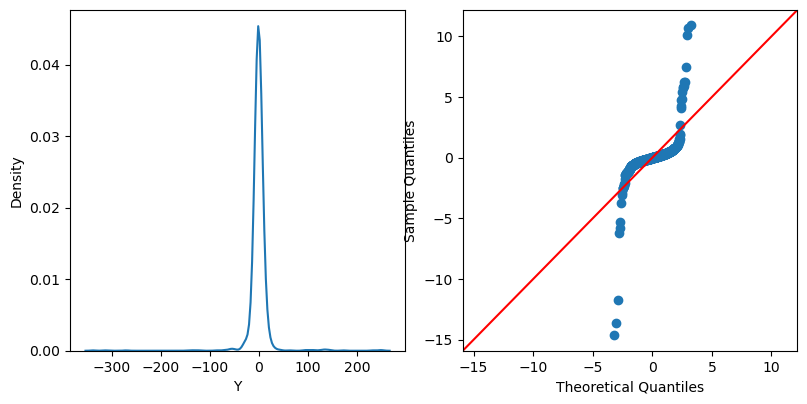

--------------------------------------------------
Fitted Values vs Residuals:
--------------------------------------------------


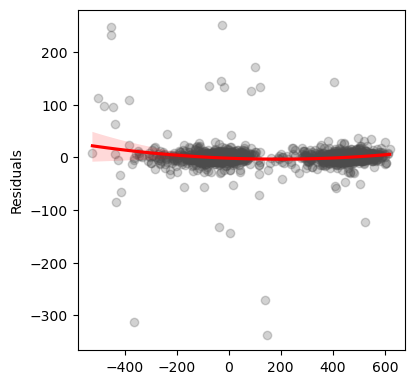

--------------------------------------------------
Numerical inputs: ['X1', 'X3', 'X5', 'X6']
--------------------------------------------------


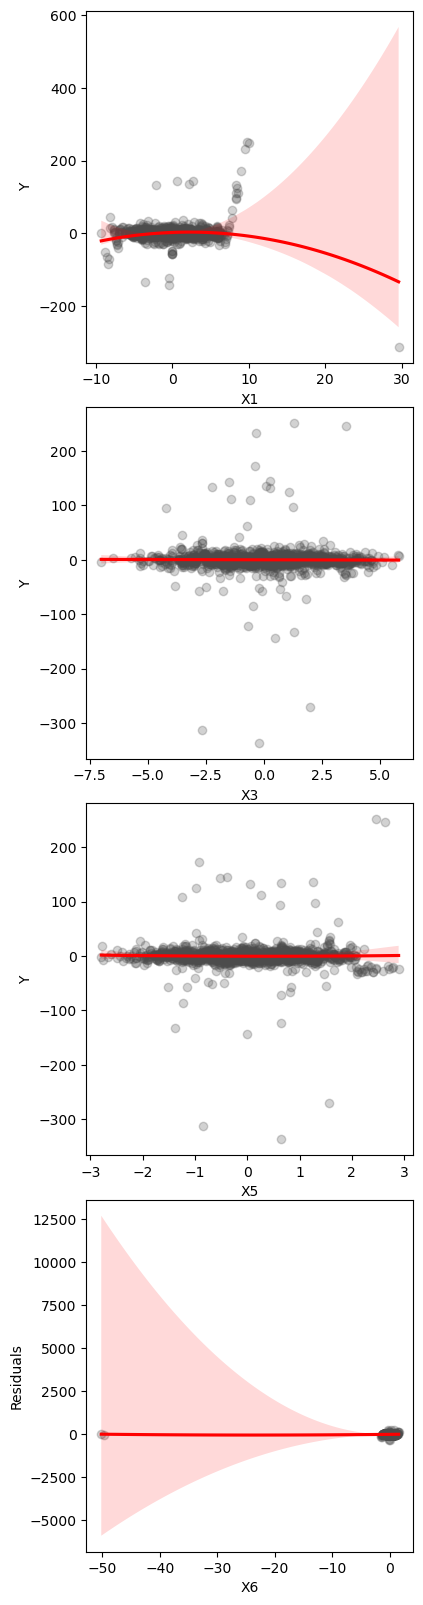

--------------------------------------------------
Categorical inputs: ['X4']
--------------------------------------------------


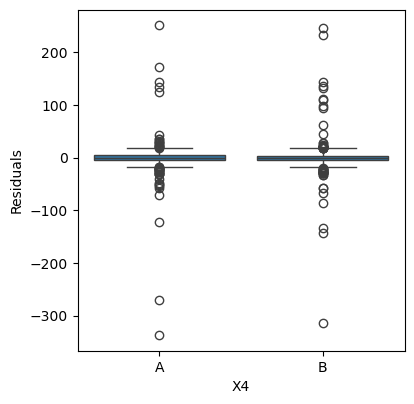

In [94]:
ResidualPlots(resid= residuals, fitted=fitted, num_inputs=num_inputs, data=dfTR, cat_inputs=cat_inputs, output=output)

In [95]:
best_index = model.best_index_
n_splits = model.n_splits_


model.cv_results_['mean_test_score'][best_index]
model_validation_scores_array = np.array([model.cv_results_[f'split{i}_test_score'] for i in range(n_splits)])
model_validation_scores = np.abs(model_validation_scores_array[:, best_index])
model_validation_scores

array([30.1390027 , 27.97516311, 37.82715607, 31.41787405, 18.57967304,
       21.2790513 , 29.05558745, 19.71788202, 45.76141112, 30.54328396])

In [96]:
model_name = "HGB"

modelDict[model_name] = {'model': model}
modelDict[model_name]["model_train_rmse"] = model_train_rmse
modelDict[model_name]["model_test_rmse"] = model_test_rmse
modelDict[model_name]["validation_scores"] = model_validation_scores
modelDict[model_name]["model_test_prediction"] = model.predict(XTS)


## Model Comparison

::: {.callout-note  icon=false}

### Model comparison criteria

The simplest approach to compare regression models is to look at the RMSE of the models in the test set. But this simple reductionist approach can sometimes be misleading because of, among other reasons:
- the test set is a small sample of the data, and the RMSE can vary from one sample to another. 
- there are other criteria that lead us to prefer one model over another, such as the complexity of the model, the interpretability of the model, the time it takes to fit the model, and the time it takes to make predictions with the model.

To address the first concern we should also look at the cross validation scores of the models, as they provide a more robust estimate of the performance of the models. To address the second concern we should look at the models in a more holistic way, and consider all the criteria that we have mentioned.

:::

The code below provides a summary of the test scores of the models (ordered by increasing error). In terms of this metric the Gradient Boosting model is clearly the best one, followed by the SVM model. 

In [97]:
model_df = modelDict.copy()
model_df  = pd.DataFrame({'model': model_df.keys(),
                          'model_train_rmse': [model_df[model]['model_train_rmse'] for model in model_df.keys()],
                          'model_test_rmse': [model_df[model]['model_test_rmse'] for model in model_df.keys()]})
model_df.sort_values(by='model_test_rmse', ascending=True)

model  model_train_rmse  model_test_rmse
1  lm_quad          0.097084         0.097226
3      HGB         23.041700        34.578584
0       lm         66.910880        87.282485
2    Lasso         66.920190        87.342866

From this overly simplistic point of view, the Gradient Boosting model is the best one. Let us examine the cross validation scores of the models using boxplots. In order to do that we create an auxiliary dataframe with the cross validation scores of the models.

In [98]:
modelDict.keys()
val_scores = {ml:(modelDict[ml])['validation_scores'] for ml in modelDict.keys()}
model_val_scores = pd.DataFrame(val_scores)
# model_val_scores.head()


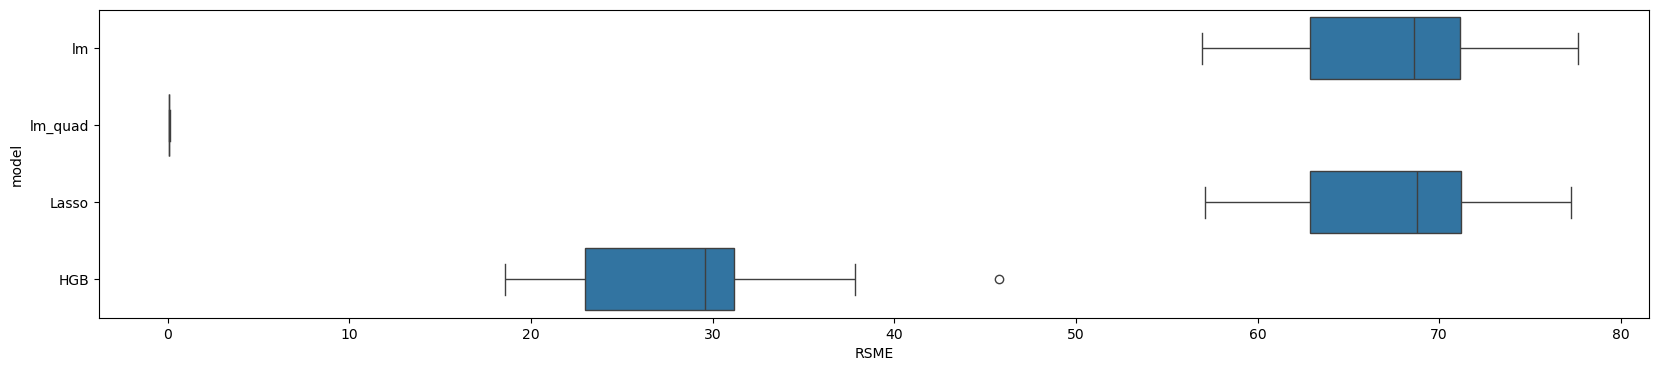

In [99]:
metric = "RSME"
fig = plt.figure(figsize=(20, 4))
sns.boxplot(model_val_scores.melt(var_name="model", value_name=metric), x=metric, y ="model");


This plot confirms some of the conclusions that we have drawn from the test scores, and shows that they do not depend on the particular sample of the data that we have used for the test set. The Gradient Boosting model seems to be the best one, followed by the linear model (remember, with some quadratic term). The Random Forest model is consistently the worst one in terms of the cross validation scores (it really would need training with a better hyperparameter grid).

The gap between the Gradient Boosting model and the other models is sizeable, and its training time is not too long. Therefore we can consider it the best model for this dataset. However, if interpretability is a concern, the linear model is a good second  alternative and the difference in performance is not that big.

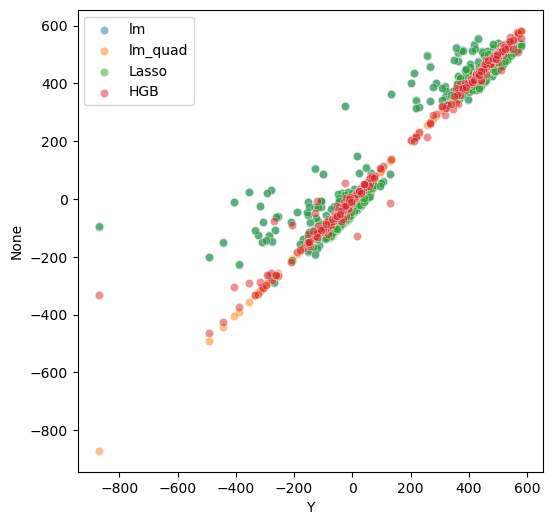

In [100]:
fig, ax = plt.subplots(figsize=(6, 6))  
for model_name in modelDict.keys():
    model_prediction = modelDict[model_name]["model_test_prediction"]
    sns.scatterplot(x=YTS, y=model_prediction, alpha=0.5, ax=ax, label=model_name)
plt.show();plt.close()